## CS/INFO 5304 Assignment 1: Data Preparation <br />


In [1]:
import pandas as pd # all the functions in the panda library are allowed

In [2]:
# Numpy, Scipy.stats, .etc are also allowed.
import matplotlib.pyplot as plt

In [3]:
ind = pd.read_pickle("Extrasensory_individual_data.p")

In [4]:
sen = pd.read_pickle("Extrasensory_sensor_data.p")

### Case 1: Actual screen time


In [5]:
## Case 1 Problem A code (and optional graph)
ind.head()

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time
0,3600D531-0C55-44A7-AE95-A7A38519464E,24,male,Android,86,4.3,5.18
1,59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2,31,female,Android,125,4.2,2.31
2,CF722AA9-2533-4E51-9FEB-9EAC84EE9AAC,37,male,iOS,60,3.9,-1.00
3,5152A2DF-FAF3-4BA8-9CA9-E66B32671A53,22,male,iOS,110,-1.0,4.75
4,136562B6-95B2-483D-88DC-065F28409FD2,19,male,Android,103,1.1,1.55


In [6]:
ind.columns # DataFrame with the participant ID and columns about demographics/phone usage

Index(['uuid', 'age', 'gender', 'system', 'hours_in_study',
       'perceived_average_screen_time', 'actual_average_screen_time'],
      dtype='object')

In [7]:
ind.shape

(60, 7)

In [8]:
len(sen) # dict of the modified dataset with participant ID as the key
# There are 60 participants in this dataset. 

60

In [9]:
ind.isna().any()

uuid                             False
age                              False
gender                           False
system                           False
hours_in_study                   False
perceived_average_screen_time    False
actual_average_screen_time       False
dtype: bool

In [10]:
ind.actual_average_screen_time.describe()

count    60.000000
mean      3.641333
std       2.109741
min      -1.000000
25%       2.730000
50%       3.675000
75%       4.507500
max      11.630000
Name: actual_average_screen_time, dtype: float64

#### Writeup Answer to Problem A: 
How are missing values represented for this feature?


*ANSWER:* Missing values are represented for actual_average_screen_time with a value of -1, which is possible here since the real value would have to be non-negative.

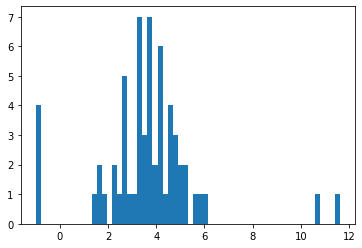

In [11]:
## Case 1 Problem B code and graph
plt.hist(ind.actual_average_screen_time, bins=60);

In [12]:
no_nulls = ind[ind.actual_average_screen_time>=0]
no_nulls.actual_average_screen_time.describe()

count    56.000000
mean      3.972857
std       1.759580
min       1.490000
25%       3.175000
50%       3.715000
75%       4.560000
max      11.630000
Name: actual_average_screen_time, dtype: float64

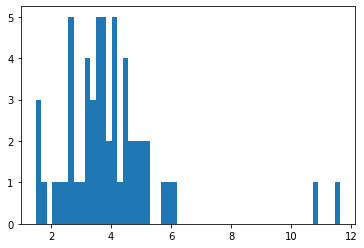

In [13]:
plt.hist(no_nulls.actual_average_screen_time, bins=len(no_nulls));

In [106]:
# An outlier is defined as being any point of data that lies over 1.5 IQRs
# below the first quartile (Q1) or above the third quartile (Q3) in a data set

# IQR = 75th percentile - 25th percentile
iqr = 4.5 - 3.175
iqr

1.3250000000000002

In [105]:
# no low outliers (magic percentile numbers are from .describe() above)
3.175000 - 1.5*iqr

1.1874999999999996

In [108]:
no_nulls.loc[no_nulls.actual_average_screen_time < 1.1874999999999996] # 2

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time


In [107]:
# high outliers
4.56 + 1.5*iqr

6.547499999999999

In [109]:
no_nulls.loc[no_nulls.actual_average_screen_time > 6.547499999999999] # 2

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time
15,1155FF54-63D3-4AB2-9863-8385D0BD0A13,23,male,Android,44,-1.0,10.78
44,33A85C34-CFE4-4732-9E73-0A7AC861B27A,29,male,Android,102,-1.0,11.63


In [18]:
# skewness
from scipy.stats import skew

In [19]:
# For normally distributed data, the skewness should be about zero. 
skew(no_nulls.actual_average_screen_time)
# a skewness value greater than zero means that there is more weight
# in the right tail of the distribution.

2.397430884216136

#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 

*ANSWER:* The distribution is skewed slightly right (positively); the tail is on the right and there are also two outliers on the high end.

In [20]:
## Case 1 Problem C code and graph
# method 1: mean
imp_mean = ind.copy()

In [21]:
imp_mean.loc[imp_mean.actual_average_screen_time < 0, "actual_average_screen_time"] = imp_mean.actual_average_screen_time.mean()

In [22]:
imp_mean.actual_average_screen_time.min()

1.49

In [23]:
# method 2: median
imp_med = ind.copy()
imp_med.loc[imp_med.actual_average_screen_time < 0, "actual_average_screen_time"] = imp_med.actual_average_screen_time.median()
imp_med.actual_average_screen_time.min()

1.49

In [24]:
# method 3: random value within range
no_nulls.actual_average_screen_time.describe()

count    56.000000
mean      3.972857
std       1.759580
min       1.490000
25%       3.175000
50%       3.715000
75%       4.560000
max      11.630000
Name: actual_average_screen_time, dtype: float64

In [25]:
import random

In [26]:
imp_rand = ind.copy()
imp_rand.loc[imp_rand.actual_average_screen_time < 0, "actual_average_screen_time"] = random.randint(3,5)
imp_rand.actual_average_screen_time.min()

1.49

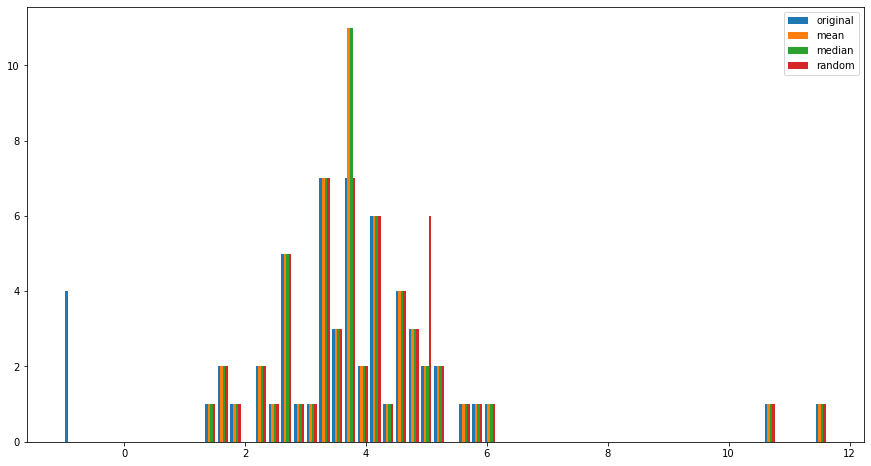

In [27]:
plt.figure(figsize=(15,8))
plt.hist([ind.actual_average_screen_time, imp_mean.actual_average_screen_time, imp_med.actual_average_screen_time, imp_rand.actual_average_screen_time],bins=60,label=['original','mean', 'median', 'random']);
plt.legend(loc='upper right');

#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 
How do the distributions look like after you implement the three filling methods? (Compare them)


In [28]:
import numpy as np

In [29]:
## Case 1 Problem D code and graph
dist = np.random.normal(3.75, 1.25, len(ind))

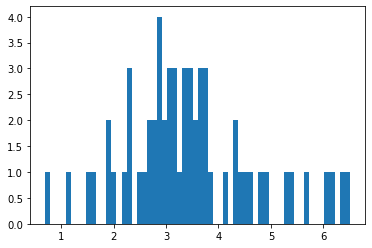

In [30]:
plt.hist(dist, bins=60);

In [31]:
from scipy.stats import ttest_ind

In [32]:
#mean
ttest_ind(dist, imp_mean.actual_average_screen_time)

Ttest_indResult(statistic=-1.8693125637540418, pvalue=0.06405835635359469)

In [33]:
#median
ttest_ind(dist, imp_med.actual_average_screen_time)

Ttest_indResult(statistic=-1.877830045117614, pvalue=0.06287302095919334)

In [34]:
#random
ttest_ind(dist, imp_rand.actual_average_screen_time)

Ttest_indResult(statistic=-2.187024288167496, pvalue=0.03071326050605608)

#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?


*ANSWER:* The p-value for the t-test between the randomly generated distribution and the mean-imputed data is 0.06 > 0.05. The one for the median-imputed data is also 0.06. But the one for the randomly imputed data is 0.03<0.05 and therefore statistically significant, indicating that it is closest in resembling the research distribution (they could be drawn from the same distribution instead of by chance). This makes sense since both are randomly generated and therefore more representative of real data than when we simply fill all missing values with the same number hoping the missing values were around the average or median value.

### Case 2: Perceived average screen time

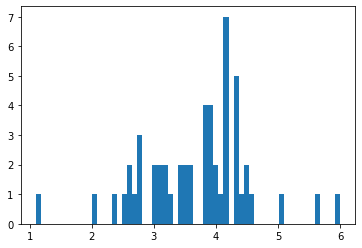

In [87]:
## Case 2 Problem A code and histogram
no_missing = ind[ind.perceived_average_screen_time>=0]
plt.hist(no_missing.perceived_average_screen_time, bins=60);

In [88]:
no_missing.perceived_average_screen_time.describe()

count    53.000000
mean      3.692453
std       0.863768
min       1.100000
25%       3.100000
50%       3.800000
75%       4.200000
max       6.000000
Name: perceived_average_screen_time, dtype: float64

In [110]:
# IQR = 75th percentile - 25th percentile
iqr = 4.2 - 3.1
iqr

1.1

In [111]:
# low outliers
3.1 - 1.5 * iqr

1.45

In [112]:
no_missing[no_missing.perceived_average_screen_time<=1.45]

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time,intense
4,136562B6-95B2-483D-88DC-065F28409FD2,19,male,Android,103,1.1,1.55,0


In [113]:
# high outliers
4.2 + 1.5 * iqr

5.8500000000000005

In [114]:
no_missing[no_missing.perceived_average_screen_time>=5.8500000000000005]

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time,intense
32,5EF64122-B513-46AE-BCF1-E62AAC285D2C,36,female,iOS,65,6.0,6.06,1


In [93]:
skew(no_missing.perceived_average_screen_time)
# a skewness value greater than zero means that there is more weight
# in the right tail of the distribution.

-0.20827754822424274

#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many? 
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 


*ANSWER:* There are 2 outliers, one low and one high. The distribution is skewed very slightly to the left, with a skewness of -0.2.

In [144]:
## Case 2 Problem B code
no_nulls[no_nulls.actual_average_screen_time > (no_nulls.actual_average_screen_time.mean() + no_nulls.actual_average_screen_time.std())]
# use no_nulls again for rows where actual_average_screen_time is not null

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time,intense
15,1155FF54-63D3-4AB2-9863-8385D0BD0A13,23,male,Android,44,-1.0,10.78,True
32,5EF64122-B513-46AE-BCF1-E62AAC285D2C,36,female,iOS,65,6.0,6.06,True
44,33A85C34-CFE4-4732-9E73-0A7AC861B27A,29,male,Android,102,-1.0,11.63,True
45,5119D0F8-FCA8-4184-A4EB-19421A40DE0D,25,female,Android,110,3.2,5.94,True


How many of them are intense phone users?

*ANSWER:* 4 individuals are "intense phone users" according to their actual average screen time when looking at individuals for whom we have actual screen time data.

In [165]:
## Case 2 Problem C code and graph
no_nulls['missing'] = [True if time < 0 else False for time in no_nulls.perceived_average_screen_time]

In [167]:
# If the user’s actual screen time is missing, you should not count that user as either intensive OR NON-INTENSIVE
no_nulls['intense'] = [True if screen_time > (no_nulls.actual_average_screen_time.mean() + no_nulls.actual_average_screen_time.std()) else False for screen_time in no_nulls.actual_average_screen_time]

In [152]:
# chi-square test: compare observed results with expected results
from scipy.stats import chi2_contingency

What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR? 

In [173]:
# defining the table
cont_tbl = pd.crosstab(no_nulls['missing'], no_nulls['intense'])
stat, p, dof, expected = chi2_contingency(cont_tbl)
  
print("p value is ", p)
if p <= 0.05:
    print('Variables are dependent (reject null hypothesis)')
else:
    print('Variables are independent (null hypothesis holds true)')

p value is  0.11666446478102341
Variables are independent (null hypothesis holds true)


*ANSWER:* 

It seems like missing values for perceived screen time are not correlated with intense phone users. Therefore, I think that perceived average screen time is Missing At Random, meaning that the cause of the missing data is unrelated to the missing values of this variable (ex. people are *not* necessarily embarrassed by their screen time) but may be related to the observed values of other variables.

### Case 3: Location

In [38]:
## Case 3 Problem A code (graph)

# location data (location:raw_latitude) are consistently lost when their
# battery level (lf_measurements:battery_level) is below 15%

In [233]:
# example entry: participant at index 0
sen[ind['uuid'][0]]

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
0,32.882483,-117.234601,0.022972,-0.002678,-1.002311,0.0,1.0,0.0,0.0,0.49
1,32.882480,-117.234595,0.021403,-0.002784,-1.001535,0.0,0.0,1.0,0.0,0.50
2,32.882482,-117.234587,0.021201,-0.004036,-1.000577,0.0,1.0,0.0,0.0,0.56
3,32.882482,-117.234587,0.021530,-0.004327,-0.998347,1.0,0.0,0.0,0.0,0.56
4,32.882483,-117.234582,0.021198,-0.004350,-1.004198,0.0,1.0,0.0,0.0,0.57
...,...,...,...,...,...,...,...,...,...,...
5198,32.879546,-117.237555,-0.059023,1.008478,-0.027813,0.0,0.0,1.0,0.0,0.65
5199,32.880290,-117.237482,-0.147803,-0.061424,-0.851655,0.0,0.0,1.0,0.0,0.65
5200,32.880383,-117.236507,-0.104133,1.043514,-0.040201,0.0,0.0,1.0,0.0,0.64
5201,32.880894,-117.235780,-0.097580,1.045405,-0.055839,0.0,0.0,1.0,0.0,0.64


In [234]:
sen[ind['uuid'][0]]['location:raw_latitude'].isna().any()

True

In [235]:
sen[ind['uuid'][0]].loc[sen[ind['uuid'][0]]['location:raw_latitude'].isna()]

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
376,NaN,NaN,-0.042663,-0.381815,-0.889453,0.0,1.0,0.0,0.0,0.13
377,NaN,NaN,-0.021713,-0.005770,1.002091,0.0,0.0,1.0,0.0,0.12
378,NaN,NaN,-0.022438,-0.006215,1.002913,0.0,0.0,1.0,0.0,0.12
379,NaN,NaN,-0.022573,-0.006324,1.001260,0.0,0.0,1.0,0.0,0.12
380,NaN,NaN,-0.022931,-0.006822,1.003204,0.0,0.0,1.0,0.0,0.12
...,...,...,...,...,...,...,...,...,...,...
1601,NaN,NaN,0.691975,-0.673450,0.236869,0.0,0.0,1.0,0.0,0.81
1602,NaN,NaN,-0.123870,-0.150572,-0.692753,0.0,0.0,1.0,0.0,0.80
1603,NaN,NaN,-0.482297,0.855854,-0.016513,0.0,0.0,1.0,0.0,0.80
1604,NaN,NaN,-0.078740,0.132637,0.054461,0.0,0.0,1.0,0.0,0.79


In [236]:
# check how battery level is recorded: 0-1
sen[ind['uuid'][0]]['lf_measurements:battery_level'].describe()

count    5203.000000
mean        0.635049
std         0.298979
min         0.000000
25%         0.390000
50%         0.640000
75%         0.970000
max         1.000000
Name: lf_measurements:battery_level, dtype: float64

In [245]:
sen[ind['uuid'][0]].loc[(sen[ind['uuid'][0]]['location:raw_latitude'].isna()) & (sen[ind['uuid'][0]]['lf_measurements:battery_level'] < 0.15)]

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
376,NaN,NaN,-0.042663,-0.381815,-0.889453,0.0,1.0,0.0,0.0,0.13
377,NaN,NaN,-0.021713,-0.005770,1.002091,0.0,0.0,1.0,0.0,0.12
378,NaN,NaN,-0.022438,-0.006215,1.002913,0.0,0.0,1.0,0.0,0.12
379,NaN,NaN,-0.022573,-0.006324,1.001260,0.0,0.0,1.0,0.0,0.12
380,NaN,NaN,-0.022931,-0.006822,1.003204,0.0,0.0,1.0,0.0,0.12
381,NaN,NaN,-0.022881,-0.006357,1.003041,0.0,0.0,1.0,0.0,0.12
382,NaN,NaN,-0.022957,-0.006546,1.002180,0.0,0.0,1.0,0.0,0.11
383,NaN,NaN,0.196818,-0.360884,-0.567186,0.0,0.0,1.0,0.0,0.11
384,NaN,NaN,0.792566,-0.601231,-0.091787,0.0,0.0,1.0,0.0,0.11
385,NaN,NaN,0.741030,-0.619769,-0.213422,0.0,0.0,1.0,0.0,0.11


In [250]:
len(sen[ind['uuid'][0]].loc[(sen[ind['uuid'][0]]['location:raw_latitude'].isna()) & (sen[ind['uuid'][0]]['lf_measurements:battery_level']< 0.15)])

10

In [257]:
# identify all people who turn off location services to save battery when the battery level is low
keys = []
for person in sen.keys(): # for each of the 60 people
    low = len(sen[person].loc[sen[person]['lf_measurements:battery_level'] < 0.15])
    low_off = len(sen[person].loc[(sen[person]['location:raw_latitude'].isna()) & (sen[person]['lf_measurements:battery_level']< 0.15)])
    if low==low_off & low > 0: # record them if they show this behavior CONSISTENTLY
        keys += [person]

In [258]:
len(keys)

6

In [259]:
print(keys)

['098A72A5-E3E5-4F54-A152-BBDA0DF7B694', 'CDA3BBF7-6631-45E8-85BA-EEB416B32A3C', '96A358A0-FFF2-4239-B93E-C7425B901B47', '481F4DD2-7689-43B9-A2AA-C8772227162B', 'B09E373F-8A54-44C8-895B-0039390B859F', 'B7F9D634-263E-4A97-87F9-6FFB4DDCB36C']


In [261]:
# For each of these individuals, how many minutes of location data have we lost due to turning off location?
# The number of records corresponds to the number of minutes that the participant underwent the study
loss = {key: len(sen[key].loc[(sen[key]['location:raw_latitude'].isna()) & (sen[key]['lf_measurements:battery_level']< 0.15)]) for key in keys}

In [262]:
loss

{'098A72A5-E3E5-4F54-A152-BBDA0DF7B694': 277,
 'CDA3BBF7-6631-45E8-85BA-EEB416B32A3C': 7,
 '96A358A0-FFF2-4239-B93E-C7425B901B47': 104,
 '481F4DD2-7689-43B9-A2AA-C8772227162B': 108,
 'B09E373F-8A54-44C8-895B-0039390B859F': 182,
 'B7F9D634-263E-4A97-87F9-6FFB4DDCB36C': 4}

**explanation of implementation:** Explain how you find these people in the Notebook. For each of these individuals, how many minutes of location data have we lost due to turning-off of location service?  

*ANSWER:* I used a dictionary comprehension to filter the dictionary by my conditions and keep the entries that matched. I found 6 individuals who matched the conditions of always having no location data when their phone battery was below 15%. We lost 277 minutes of location data from the first participant out of the 6, 7 for the second, 104 for the third, 108 for the fourth, 182 for the fifth, and 4 for the sixth.

In [263]:
## Case 3 Problem B code and graph
subject = 'F50235E0-DD67-4F2A-B00B-1F31ADA998B9'
sen[subject]

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
0,32.882301,-117.234683,-0.018860,0.037530,1.038409,0.0,0.0,0.0,1.0,0.80
1,32.882297,-117.234704,0.049835,0.092630,0.983184,0.0,0.0,0.0,1.0,0.78
2,32.882288,-117.234700,0.015455,0.012330,1.043454,0.0,0.0,0.0,1.0,0.78
3,32.882315,-117.234685,0.014795,0.010820,1.048484,0.0,0.0,0.0,1.0,0.77
4,32.882304,-117.234690,0.014965,0.011975,1.044709,0.0,0.0,0.0,1.0,0.77
...,...,...,...,...,...,...,...,...,...,...
2261,32.871460,-117.246647,0.797243,0.703823,-0.016015,0.0,0.0,0.0,1.0,0.94
2262,32.872778,-117.245349,0.823473,0.671712,-0.071075,0.0,0.0,0.0,1.0,0.94
2263,32.875152,-117.244326,0.800798,0.690428,-0.150936,0.0,0.0,0.0,1.0,0.94
2264,32.875487,-117.243996,0.553757,0.899438,-0.017660,0.0,0.0,0.0,1.0,0.94


In [264]:
sen[subject].columns

Index(['location:raw_latitude', 'location:raw_longitude', 'raw_acc:3d:mean_x',
       'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z',
       'discrete:app_state:is_active', 'discrete:app_state:is_inactive',
       'discrete:app_state:is_background', 'discrete:app_state:missing',
       'lf_measurements:battery_level'],
      dtype='object')

In [267]:
sen[subject].loc[sen[subject]['location:raw_latitude'].isna()]

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
33,NaN,NaN,0.153591,0.317961,0.754153,0.0,0.0,0.0,1.0,0.69
36,NaN,NaN,0.767498,-0.712873,0.260261,0.0,0.0,0.0,1.0,0.67
37,NaN,NaN,0.770958,-0.694803,0.289361,0.0,0.0,0.0,1.0,0.67
38,NaN,NaN,0.779568,-0.682628,0.294881,0.0,0.0,0.0,1.0,0.67
39,NaN,NaN,0.786143,-0.679253,0.276656,0.0,0.0,0.0,1.0,0.67
...,...,...,...,...,...,...,...,...,...,...
1835,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2033,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2097,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2121,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [309]:
# Forward filling: Assume the missing value occurs at tn, fill in the value using tn-1. 
forward = sen[subject].copy()

for entry in range(1, len(forward['location:raw_latitude'])):
    if pd.isna(forward['location:raw_latitude'][entry]):
        forward['location:raw_latitude'][entry] = forward['location:raw_latitude'][entry-1]

In [310]:
forward['location:raw_latitude'].isna().any()

False

In [321]:
# Backward filling: Assume the missing value occurs at tn, fill in the value using tn+1.
backward = sen[subject].copy()

for entry in range(len(backward['location:raw_latitude'])-1, 0, -1): # step back
    if pd.isna(backward['location:raw_latitude'][entry]):
        backward['location:raw_latitude'][entry] = backward['location:raw_latitude'][entry+1]
    
backward['location:raw_latitude'].isna().any()

False

In [429]:
# Linear interpolation: For each CHUNK of missing values, perform linear interpolation with
# the value of one sample before the missing chunk, and one value after the missing chunk.

interp = sen[subject].copy()
interp['location:raw_latitude'].isna().sum()

156

In [362]:
sen[subject]['location:raw_latitude'][0] # doesn't start null

32.882301

In [430]:
start = False # True when in middle of chunk of nulls
for current in range(1, len(interp['location:raw_latitude'])):
    if (start==False) & (pd.isna(interp['location:raw_latitude'][current])): # find first null value in a chunk
        start = current # save location
    if (start!=False) & (pd.isna(interp['location:raw_latitude'][current]) != True): # find next non-null value index
        steps = current - start # number of indices to step through
        if interp['location:raw_latitude'][current] > interp['location:raw_latitude'][start-1]: # step up
            rng = interp['location:raw_latitude'][current] - interp['location:raw_latitude'][start-1]
            inc = rng/steps
            new_val = interp['location:raw_latitude'][start-1] + inc
            for i in range(start,current): # loop through again to fill
                interp['location:raw_latitude'][i] = new_val
                new_val += inc # step up in equal increments
        if interp['location:raw_latitude'][current] < interp['location:raw_latitude'][start-1]: # step down
            rng = interp['location:raw_latitude'][start-1] - interp['location:raw_latitude'][current]
            inc = rng/steps
            new_val = interp['location:raw_latitude'][start-1] - inc
            for i in range(start,current):
                interp['location:raw_latitude'][i] = new_val
                new_val -= inc # step down in equal increments
        else: # they are the same
            for i in range(start,current):
                interp['location:raw_latitude'][i] = interp['location:raw_latitude'][current]
        
        start=False # reset for next chunk
        
interp['location:raw_latitude'].isna().sum() # yay

0

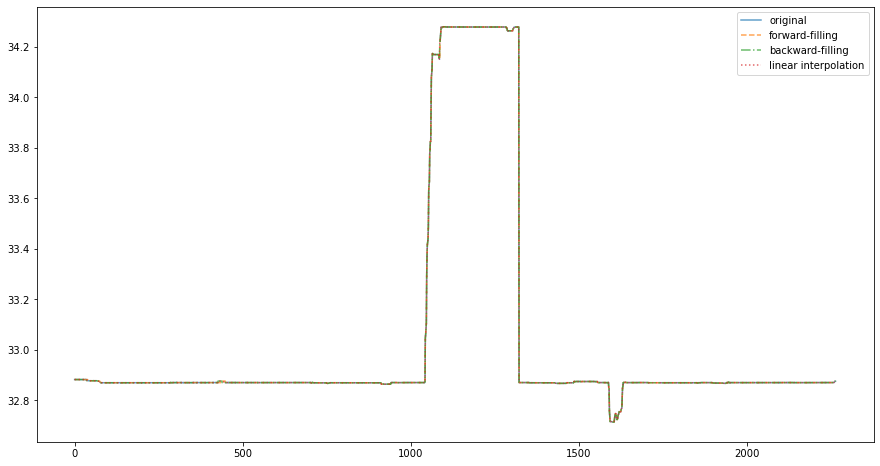

In [435]:
# Produce a figure with 4 traces overlaid on each other
# (4 traces including the original, unfilled trace and trace produced by your three filling methods)

plt.figure(figsize=(15,8))
plt.plot(sen[subject]['location:raw_latitude'],label = "original", linestyle="-", alpha=0.7)
plt.plot(forward['location:raw_latitude'], label = "forward-filling", linestyle="--", alpha=0.7)
plt.plot(backward['location:raw_latitude'],label = "backward-filling", linestyle="-.", alpha=0.7)
plt.plot(interp['location:raw_latitude'], label = "linear interpolation", linestyle=":", alpha=0.7)
plt.legend(); # hard to see...

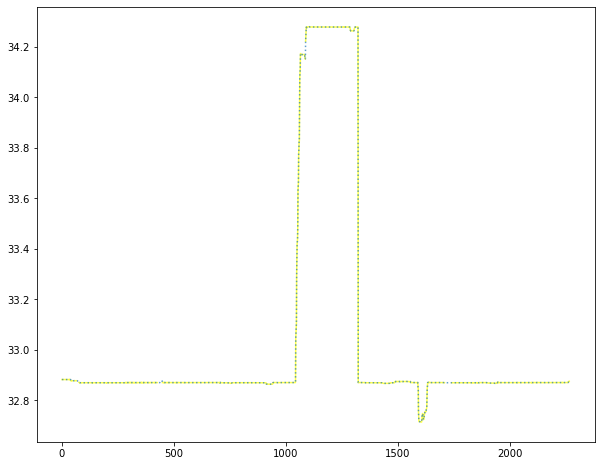

In [440]:
# orig & forward-fill
plt.figure(figsize=(10,8))
plt.plot(sen[subject]['location:raw_latitude'],label = "original", linestyle="-", alpha=0.7, color = "yellow")
plt.plot(forward['location:raw_latitude'], label = "forward-filling", linestyle=":", alpha=0.7);

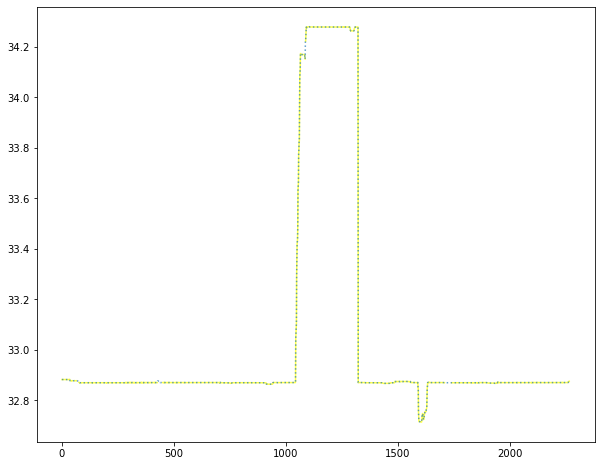

In [441]:
# orig & backward-fill
plt.figure(figsize=(10,8))
plt.plot(sen[subject]['location:raw_latitude'],label = "original", linestyle="-", alpha=0.7, color = "yellow")
plt.plot(backward['location:raw_latitude'], label = "backward-filling", linestyle=":", alpha=0.7);

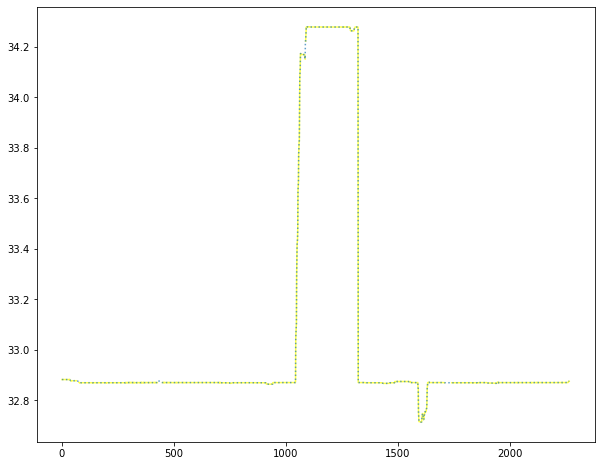

In [442]:
# orig & linear interpolation
plt.figure(figsize=(10,8))
plt.plot(sen[subject]['location:raw_latitude'],label = "original", linestyle="-", alpha=0.7, color = "yellow")
plt.plot(interp['location:raw_latitude'], label = "linear interpolation", linestyle=":", alpha=0.7);

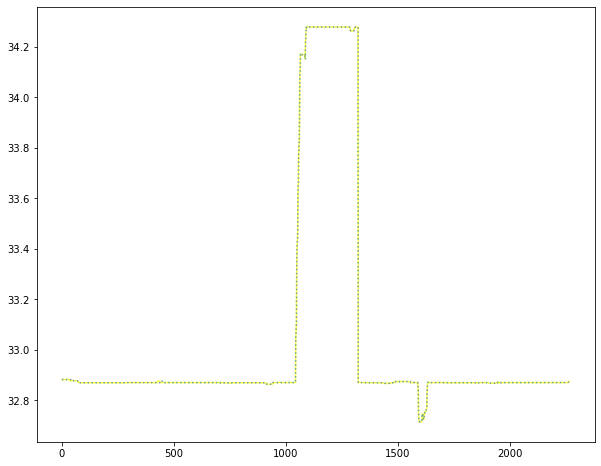

In [443]:
# back & forward-fill: pretty much the same
plt.figure(figsize=(10,8))
plt.plot(backward['location:raw_latitude'],label = "backward-filling", linestyle="-", alpha=0.7, color = "yellow")
plt.plot(forward['location:raw_latitude'], label = "forward-filling", linestyle=":", alpha=0.7);

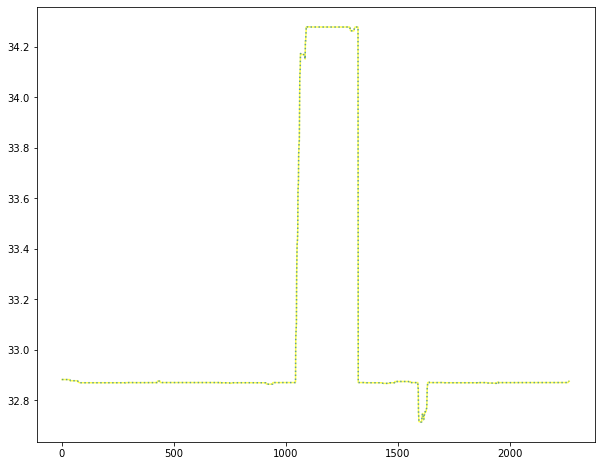

In [444]:
# back & linear interp
plt.figure(figsize=(10,8))
plt.plot(backward['location:raw_latitude'],label = "backward-filling", linestyle="-", alpha=0.7, color = "yellow")
plt.plot(interp['location:raw_latitude'], label = "interpolation", linestyle=":", alpha=0.7);

Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose? 


*ANSWER:* They all look pretty good! If I were to use this dataset for further analysis, I would probably choose  linear interpolation just because it was fun to implement and seems like it would be the most accurate based on common sense.